In [1]:
import sys
sys.path.append('../Utils/')

from IOUtils import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

%matplotlib inline
%load_ext autoreload
%autoreload 2

def ternary (n, l):
    if n == 0:
        return '0'*l
    nums = []
    while n:
        n, r = divmod(n, 3)
        nums.append(str(r))
    return ('0'*(l-len(nums))) + ''.join(reversed(nums))

def sequence_freq(tick_sequence, n):
    sequence_dict = {ternary(k, n): tick_sequence.count(ternary(k, n)) for k in range(3**n)}
    sequence_freq = pd.DataFrame(list(sequence_dict.items()), columns = ['sequence', 'freq'])
    sequence_freq['prior'] = sequence_freq['sequence'].str.slice(0, n-1)
    sequence_freq['move'] = sequence_freq['sequence'].str.slice(n-1, n)
    sequence_freq = sequence_freq.pivot(index = 'prior', columns = 'move', values = 'freq')
    sequence_freq['total'] = sequence_freq['0'] + sequence_freq['1'] + sequence_freq['2']
    sequence_freq['max'] = sequence_freq.loc[:, '0':'2'].idxmax(axis = 1)
    sequence_freq['max_pct'] = sequence_freq.loc[:, '0':'2'].max(axis = 1)/sequence_freq['total']
    sequence_freq['prior'] = 'p'+sequence_freq.index.map(str)
    return sequence_freq

# Word Library

## Rb

### Rb1612 - 1min

In [2]:
instrument = 'rb1612*'
symbol = 'rb'
top_path = '/home/rz14/Documents/QR_Qishi/tick2016/rb/'

freq = '1min'
output_path = './Output/'

tick_day = df_reader(instrument, topdir= top_path+'day', freq=freq, session='Day', symbol=symbol).get_tick(raw=False)
tick_night = df_reader(instrument, topdir= top_path+'night', freq=freq, session='night', symbol=symbol).get_tick(raw=False)


tick_all = pd.concat([tick_day, tick_night], axis=0).sort_index()

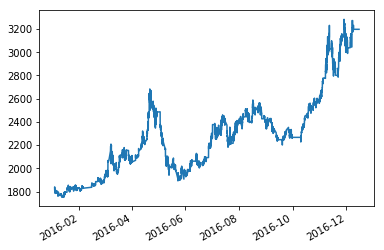

In [3]:
tick_all.LastPrice.plot()

In [4]:
tick_all['PriceChange'] = tick_all['LastPrice'].pct_change()
tick_all['Direction'] = tick_all['PriceChange'].apply(lambda x: 2 if x > 0 else (1 if x < 0 else 0))
Tick_Change_Sequence = tick_all['Direction'].astype(str).str.cat()
tick_all.shape

(227552, 39)

In [5]:
sequence_freq_all = pd.DataFrame()
for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence, n)
    sequence_freq_all = sequence_freq_all.append(tmp)
sequence_freq_all.to_csv(output_path+'_'+'_'.join([instrument.strip('*'), freq])+'.csv', index=False)

### Rb1612 - 5min

(45876, 39)

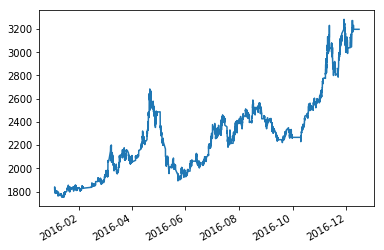

In [6]:
instrument = 'rb1612*'
symbol = 'rb'
top_path = '/home/rz14/Documents/QR_Qishi/tick2016/rb/'

freq = '5min'
output_path = './Output/'

tick_day = df_reader(instrument, topdir= top_path+'day', freq=freq, session='Day', symbol=symbol).get_tick(raw=False)
tick_night = df_reader(instrument, topdir= top_path+'night', freq=freq, session='night', symbol=symbol).get_tick(raw=False)


tick_all = pd.concat([tick_day, tick_night], axis=0).sort_index()

tick_all.LastPrice.plot()

tick_all['PriceChange'] = tick_all['LastPrice'].pct_change()
tick_all['Direction'] = tick_all['PriceChange'].apply(lambda x: 2 if x > 0 else (1 if x < 0 else 0))
Tick_Change_Sequence = tick_all['Direction'].astype(str).str.cat()
tick_all.shape

In [7]:
sequence_freq_all = pd.DataFrame()
for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence, n)
    sequence_freq_all = sequence_freq_all.append(tmp)
sequence_freq_all.to_csv(output_path+'_'+'_'.join([instrument.strip('*'), freq])+'.csv', index=False)

## Rb1701 - 1min

(352803, 39)

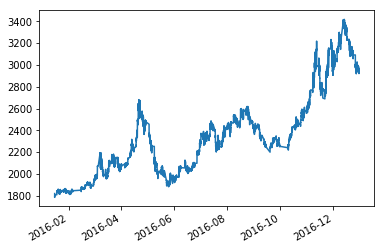

In [8]:
instrument = 'rb1701*'
symbol = 'rb'
top_path = '/home/rz14/Documents/QR_Qishi/tick2016/rb/'

freq = '1min'
output_path = './Output/'

tick_day = df_reader(instrument, topdir= top_path+'day', freq=freq, session='Day', symbol=symbol).get_tick(raw=False)
tick_night = df_reader(instrument, topdir= top_path+'night', freq=freq, session='night', symbol=symbol).get_tick(raw=False)


tick_all = pd.concat([tick_day, tick_night], axis=0).sort_index()

tick_all.LastPrice.plot()

tick_all['PriceChange'] = tick_all['LastPrice'].pct_change()
tick_all['Direction'] = tick_all['PriceChange'].apply(lambda x: 2 if x > 0 else (1 if x < 0 else 0))
Tick_Change_Sequence = tick_all['Direction'].astype(str).str.cat()
tick_all.shape

In [9]:
sequence_freq_all = pd.DataFrame()
for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence, n)
    sequence_freq_all = sequence_freq_all.append(tmp)
sequence_freq_all.to_csv(output_path+'_'+'_'.join([instrument.strip('*'), freq])+'.csv', index=False)

## Rb1701 - 5min

(70935, 39)

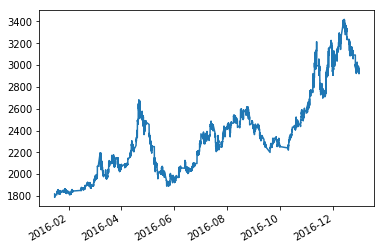

In [10]:
instrument = 'rb1701*'
symbol = 'rb'
top_path = '/home/rz14/Documents/QR_Qishi/tick2016/rb/'

freq = '5min'
output_path = './Output/'

tick_day = df_reader(instrument, topdir= top_path+'day', freq=freq, session='Day', symbol=symbol).get_tick(raw=False)
tick_night = df_reader(instrument, topdir= top_path+'night', freq=freq, session='night', symbol=symbol).get_tick(raw=False)


tick_all = pd.concat([tick_day, tick_night], axis=0).sort_index()

tick_all.LastPrice.plot()

tick_all['PriceChange'] = tick_all['LastPrice'].pct_change()
tick_all['Direction'] = tick_all['PriceChange'].apply(lambda x: 2 if x > 0 else (1 if x < 0 else 0))
Tick_Change_Sequence = tick_all['Direction'].astype(str).str.cat()
tick_all.shape

In [11]:
sequence_freq_all = pd.DataFrame()
for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence, n)
    sequence_freq_all = sequence_freq_all.append(tmp)
sequence_freq_all.to_csv(output_path+'_'+'_'.join([instrument.strip('*'), freq])+'.csv', index=False)

## Bu
### Bu1612 - 1min

In [12]:
instrument = 'bu1612*'
symbol = 'Bu'
top_path = '/home/rz14/Documents/QR_Qishi/tick2016/bu/'

freq = '1min'
output_path = './Output/'

tick_day = df_reader(instrument, topdir= top_path+'day', freq=freq, session='Day', symbol=symbol).get_tick(raw=False)
tick_night = df_reader(instrument, topdir= top_path+'night', freq=freq, session='night', symbol=symbol).get_tick(raw=False)


tick_all = pd.concat([tick_day, tick_night], axis=0).sort_index()

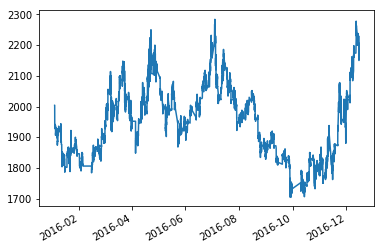

In [13]:
tick_all.LastPrice.plot()

In [14]:
tick_all['PriceChange'] = tick_all['LastPrice'].pct_change()
tick_all['Direction'] = tick_all['PriceChange'].apply(lambda x: 2 if x > 0 else (1 if x < 0 else 0))
Tick_Change_Sequence = tick_all['Direction'].astype(str).str.cat()
tick_all.shape

(123978, 39)

In [15]:
sequence_freq_all = pd.DataFrame()
for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence, n)
    sequence_freq_all = sequence_freq_all.append(tmp)
sequence_freq_all.to_csv(output_path+'_'+'_'.join([instrument.strip('*'), freq])+'.csv', index=False)

### Bu1612 - 5min

(25098, 39)

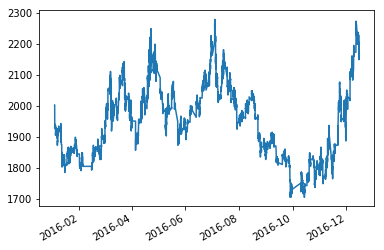

In [16]:
instrument = 'bu1612*'
symbol = 'Bu'
top_path = '/home/rz14/Documents/QR_Qishi/tick2016/bu/'

freq = '5min'
output_path = './Output/'

tick_day = df_reader(instrument, topdir= top_path+'day', freq=freq, session='Day', symbol=symbol).get_tick(raw=False)
tick_night = df_reader(instrument, topdir= top_path+'night', freq=freq, session='night', symbol=symbol).get_tick(raw=False)


tick_all = pd.concat([tick_day, tick_night], axis=0).sort_index()

tick_all.LastPrice.plot()

tick_all['PriceChange'] = tick_all['LastPrice'].pct_change()
tick_all['Direction'] = tick_all['PriceChange'].apply(lambda x: 2 if x > 0 else (1 if x < 0 else 0))
Tick_Change_Sequence = tick_all['Direction'].astype(str).str.cat()
tick_all.shape

In [17]:
sequence_freq_all = pd.DataFrame()
for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence, n)
    sequence_freq_all = sequence_freq_all.append(tmp)
sequence_freq_all.to_csv(output_path+'_'+'_'.join([instrument.strip('*'), freq])+'.csv', index=False)

### Bu1701 - 1min

(36128, 39)

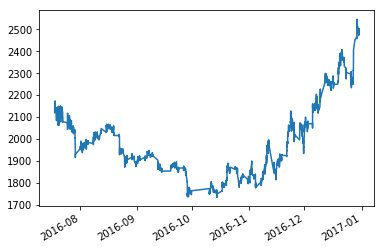

In [18]:
instrument = 'bu1701*'
symbol = 'Bu'
top_path = '/home/rz14/Documents/QR_Qishi/tick2016/bu/'

freq = '1min'
output_path = './Output/'

tick_day = df_reader(instrument, topdir= top_path+'day', freq=freq, session='Day', symbol=symbol).get_tick(raw=False)
tick_night = df_reader(instrument, topdir= top_path+'night', freq=freq, session='night', symbol=symbol).get_tick(raw=False)


tick_all = pd.concat([tick_day, tick_night], axis=0).sort_index()

tick_all.LastPrice.plot()

tick_all['PriceChange'] = tick_all['LastPrice'].pct_change()
tick_all['Direction'] = tick_all['PriceChange'].apply(lambda x: 2 if x > 0 else (1 if x < 0 else 0))
Tick_Change_Sequence = tick_all['Direction'].astype(str).str.cat()
tick_all.shape

In [19]:
sequence_freq_all = pd.DataFrame()
for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence, n)
    sequence_freq_all = sequence_freq_all.append(tmp)
sequence_freq_all.to_csv(output_path+'_'+'_'.join([instrument.strip('*'), freq])+'.csv', index=False)

### Bu1701 - 5min

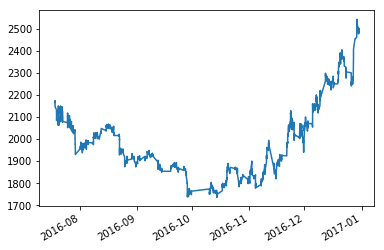

In [21]:
instrument = 'bu1701*'
symbol = 'Bu'
top_path = '/home/rz14/Documents/QR_Qishi/tick2016/bu/'

freq = '5min'
output_path = './Output/'

tick_day = df_reader(instrument, topdir= top_path+'day', freq=freq, session='Day', symbol=symbol).get_tick(raw=False)
tick_night = df_reader(instrument, topdir= top_path+'night', freq=freq, session='night', symbol=symbol).get_tick(raw=False)


tick_all = pd.concat([tick_day, tick_night], axis=0).sort_index()

tick_all.LastPrice.plot()

tick_all['PriceChange'] = tick_all['LastPrice'].pct_change()
tick_all['Direction'] = tick_all['PriceChange'].apply(lambda x: 2 if x > 0 else (1 if x < 0 else 0))
Tick_Change_Sequence = tick_all['Direction'].astype(str).str.cat()
tick_all.shape

sequence_freq_all = pd.DataFrame()
for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence, n)
    sequence_freq_all = sequence_freq_all.append(tmp)
sequence_freq_all.to_csv(output_path+'_'+'_'.join([instrument.strip('*'), freq])+'.csv', index=False)

## Todo:
1. Plot the change of word frequency as a function of string lenghs
3. Plot Time value
2. Check xgboost or other machine learning methods. Try to include all string?